INTRODUCTION                                                                                                                    
I am Hyndavi Gundapuneni, I got datda set about rewies of ZOMATO Restraunt. In any business reviews are very importanat, they show                                                                                                                           1) Better Understand your Customers & Improve Customer Service.                                                                  2) Credibility & Social Proof.                                                                                                    3) Fight with experience to save margins. 4) Allow Consumers to Have a Voice and Create Customer Loyalty. 5) Improve Rankings. 6) Consumers are Doing your Marketing for You. And many more... . So analysing this dataset helps the company in many way. Now coming to ZOMATO: Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities. As of 2019, the service is available in 24 countries and in more than 10,000 cities. For such a company Reviews are the most important criteria to analyse their own companies performance. So we are going to analyse this dataset using EDA- Exploratory Data Analysis and its helping components. We will visualise this dataset using graphs and maps at the same time we will filter out all the reviews using their rating values and find the reasons behind the high rating as well as its low ratings. Which will help the company to understand what to change so that their reviews will increase and be more positive. So lets jump into analysis now......

Let's import all the needed libraries into our notebook

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now we will read our csv file

In [190]:
zr = pd.read_csv("Zomato Restaurant reviews.csv")
zr

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",06-05-2016 00:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",06-04-2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",06-03-2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


As the dataset is very big lets just view first five rows using .head()

In [194]:
zr.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


Let's also have a look at the last five rows of the dataset using .tail()

In [ ]:
zr.tail()

We will now see completely how many (rows, columns) are there in our dataset

In [ ]:
zr.shape

We have 10000 rows and 7 columns in our dataset.

Let's see the information of our dataset

In [ ]:
zr.info()

We can see that in 7 columns only pictures column is in integer type and all the others are object type

Converting Time into datatime - Since it is a string

In [ ]:
zr['Time']=pd.to_datetime(zr['Time'])

Converting 'Rating' to numerical datatype (float)

In [ ]:
zr['Rating'] = zr['Rating'].str.replace('£', '').str.replace(',','')
zr['Rating'] = pd.to_numeric(zr['Rating'])
zr['Rating']

We can see that we are getting an error because there is a catagarical data in between in the row 7601

Let's display row 7601 and see

In [ ]:
display(zr.iloc[7601])

Yes there is a word LIKE in between our row

So let's change it to an empty data

In [162]:
zr.at[7601,'Rating']=''

Now we changed like to an empty set. Let's display 7601 row again and see

In [163]:
display(zr.iloc[7601])

Restaurant                        The Old Madras Baking Company
Reviewer                                      Dhanasekar Kannan
Review        One of the best pizzas to try. It served with ...
Rating                                                         
Metadata                              12 Reviews , 21 Followers
Time                                        2019-05-18 12:31:00
Pictures                                                      1
Name: 7601, dtype: object

It's successfully changed.

Now let's fill empty cells with NAN value

In [164]:
zr=zr.mask(zr == '')
zr

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0


In [165]:
display(zr.iloc[7601])

Restaurant                        The Old Madras Baking Company
Reviewer                                      Dhanasekar Kannan
Review        One of the best pizzas to try. It served with ...
Rating                                                      NaN
Metadata                              12 Reviews , 21 Followers
Time                                        2019-05-18 12:31:00
Pictures                                                      1
Name: 7601, dtype: object

Now let's Convert 'Rating' to numerical datatype (float)

In [166]:
zr['Rating'] = zr['Rating'].astype('float')

In [167]:
zr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  10000 non-null  object        
 1   Reviewer    9962 non-null   object        
 2   Review      9955 non-null   object        
 3   Rating      9961 non-null   float64       
 4   Metadata    9962 non-null   object        
 5   Time        9962 non-null   datetime64[ns]
 6   Pictures    10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 547.0+ KB


Now lets see the whole description of our pictures column which is in integer type

In [168]:
zr.describe()

,Rating,Pictures
count,9961.000000,10000.000000
mean,3.601044,0.748600
std,1.483461,2.570381
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,64.000000


Let's see completely how many different/unique Restaurants are there in our dataset

In [169]:
zr['Restaurant'].unique()

array(['Beyond Flavours', 'Paradise', 'Flechazo',
       'Shah Ghouse Hotel & Restaurant', 'Over The Moon Brew Company',
       "The Fisherman's Wharf", 'eat.fit', 'Shah Ghouse Spl Shawarma',
       'Hyper Local', 'Cream Stone', "Sardarji's Chaats & More",
       'Barbeque Nation', 'Absolute Sizzlers',
       'The Lal Street - Bar Exchange', "AB's - Absolute Barbecues",
       'KFC', 'NorFest - The Dhaba', 'Hotel Zara Hi-Fi',
       '10 Downing Street', 'Pakwaan Grand', '13 Dhaba',
       "Jonathan's Kitchen - Holiday Inn Express & Suites", 'B-Dubs',
       'Amul', 'SKYHY', 'Tiki Shack', 'Mustang Terrace Lounge',
       "3B's - Buddies, Bar & Barbecue", 'Behrouz Biryani',
       'Hunger Maggi Point', 'Pot Pourri', 'Pista House',
       'Marsala Food Company', 'Club Rogue',
       'Mazzo - Marriott Executive Apartments',
       'Green Bawarchi Restaurant', 'Banana Leaf Multicuisine Restaurant',
       'Kritunga Restaurant', 'The Glass Onion', 'Deli 9 Bistro',
       'Frio Bistro', 'Kara

Now let's see the count of the unique restaurants of our dataset

In [170]:
n= len(zr['Restaurant'].unique())
n

100

There are 100 different restaurants in our dataset

Let's check for Null values

In [171]:
zr.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        39
Metadata      38
Time          38
Pictures       0
dtype: int64

Checking for null columns

In [172]:
[features for features in zr.columns if zr[features].isnull().sum()>0]

['Reviewer', 'Review', 'Rating', 'Metadata', 'Time']

We have 5 columns containing nan vlues

In [ ]:
null_columns

<AxesSubplot:>

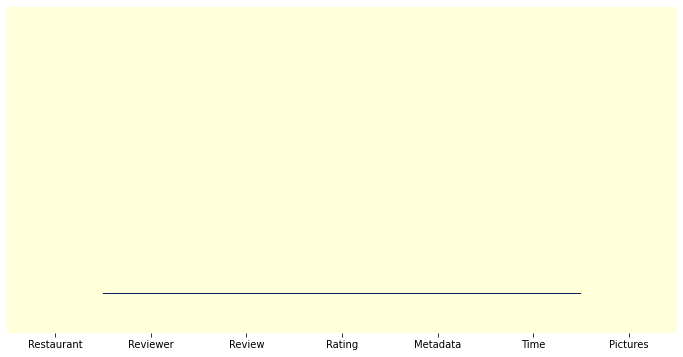

In [173]:
plt.figure(figsize=(12,6))
sns.heatmap(zr.isnull(), cbar=False,yticklabels=False,cmap="YlGnBu")

Check for NaN under an entire DataFrame:

In [176]:
zr.isnull().values.any()

True

Count the NaN under an entire DataFrame:

In [177]:
zr.isnull().sum().sum()

198

There are completely 198 nan values

Plotting the distribution curve

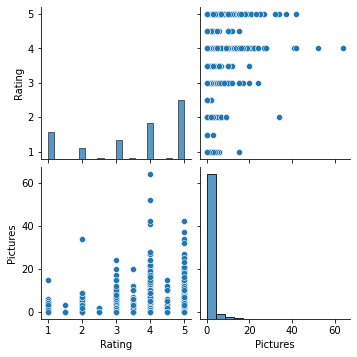

In [178]:
sns.pairplot(zr)

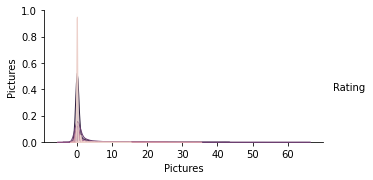

In [179]:
sns.pairplot(
data=zr,
aspect=1.85,
hue='Rating');

In [ ]:
sns.pairplot(
data=zr,
aspect=1.85,
hue='Metadata');

In [ ]:
sns.pairplot(
data=zr,
aspect=1.85,
hue='Reviewer');

In [ ]:
sns.pairplot(
data=zr,
aspect=1.85,
hue='Restaurant');

In [ ]:
sns.set(font_scale=1.15)
plt.figure(figsize=(8,4))
sns.heatmap(
zr.corr(),
cmap='RdBu_r',
annot=True,
vmin=-1, vmax=1);